In [16]:
# from fer import FER
# from fer import Video
# import pandas as pd
# import matplotlib.pyplot as plt
# video_file: str = "JPowell.mp4"

# face_detector: FER = FER(mtcnn=True)

# # preprocess video file
# processed_video = Video(video_file=video_file)

# processing_data = processed_video.analyze(face_detector,display=True)

# df= pd.DataFrame(processing_data)

In [17]:
# df= pd.DataFrame(processing_data)

# df.to_excel('FER_df.xlsx',index=False)

In [18]:
# # use the data  to decide the our execution/approach
# import numpy as np
# df.dropna(axis=1,inplace=True)
# df['minutes']=(np.arange(len(df))//60)+1
# df_grouped_by_minute = df.groupby('minutes').sum()
# df_grouped_by_minute.head()


In [19]:
# df['positive']=df['happy0']+df['surprise0']
# df['negative']=df['angry0']+df['disgust0']+df['fear0']+df['sad0']

# # Correct the dictionary for renaming
# neutral_dict = {'neutral0': 'neutral'}

# # # Use the rename method with the columns parameter
# # df.rename(columns=neutral_dict, inplace=True)
# df_grouped_by_minute=df_grouped_by_minute.reset_index(drop=True)

In [20]:
# df[(df['negative']>=0.4) & (df['negative']>df['neutral'])].reset_index(drop=True)

In [21]:
# Read the Dec Data for 2023
import pandas as pd
df= pd.read_csv('/Users/harithadiwidjaya/Desktop/FACIAL_EMOTIONAL_RECOGNITION/Dec_Data.csv',header=0)
df.head()

,angry,disgust,fear,happy,sad,surprise,neutral
0,0.08,0.00,0.03,0.21,0.02,0.02,0.65
1,0.53,0.00,0.31,0.04,0.03,0.06,0.03
2,0.15,0.00,0.07,0.19,0.04,0.03,0.51
3,0.46,0.01,0.32,0.06,0.06,0.06,0.03
4,0.08,0.00,0.05,0.02,0.07,0.02,0.75


In [22]:
#group the df by minutes
import numpy as np

df['minutes']=(np.arange(len(df))//1784)+1
df_grouped_by_minute = df.groupby('minutes').sum()
df_grouped_by_minute.head()

,angry,disgust,fear,happy,sad,surprise,neutral
minutes,,,,,,,
1,380.52,0.17,142.20,157.48,215.58,37.52,849.13
2,411.51,0.31,114.16,155.64,130.10,28.78,942.20
3,385.07,0.37,117.48,137.26,109.64,33.75,999.06
4,329.46,0.02,45.71,136.77,102.29,24.97,1143.37
5,282.01,1.75,56.79,153.40,89.05,29.12,1170.46


In [23]:
df_grouped_by_minute.reset_index(drop=True,inplace=True)

In [24]:
import requests
import pandas as pd
API_KEY = 'JDRUHFYE77G75DS7'
symbol = 'SPY'
interval = '1min'

# url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&apikey={API_KEY}'
url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&extended_hours=false&month=2023-12&outputsize=full&apikey={API_KEY}"
r = requests.get(url)
data = r.json()

time_series_key = next(key for key in data.keys() if "Time Series" in key)  # Find the correct key for the time series data

finance_data = pd.DataFrame(data[time_series_key]).T

finance_data.index = pd.to_datetime(finance_data.index)
for column in finance_data.columns:
    finance_data[column] = pd.to_numeric(finance_data[column], errors='coerce')

column_mapping = {
    '1. open': 'Open',
    '2. high': 'High',
    '3. low': 'Low',
    '4. close': 'Close',
    '5. volume': 'Volume'
}
finance_data.rename(columns=column_mapping, inplace=True)
finance_data.sort_index(inplace=True)

In [25]:
# differencing in prices

finance_data['Close_diff']=finance_data['Close'].diff()
finance_data['change_volume']=finance_data['Volume'].diff()
finance_data

,Open,High,Low,Close,Volume,Close_diff,change_volume
2023-12-01 09:30:00,453.934,453.974,453.719,453.740,416475,NaN,NaN
2023-12-01 09:31:00,453.744,453.864,453.714,453.715,150021,-0.025,-266454.0
2023-12-01 09:32:00,453.725,453.735,453.387,453.495,213584,-0.220,63563.0
2023-12-01 09:33:00,453.505,453.685,453.345,453.545,567684,0.050,354100.0
2023-12-01 09:34:00,453.540,453.675,453.465,453.635,249273,0.090,-318411.0
...,...,...,...,...,...,...,...
2023-12-29 15:55:00,474.750,474.935,474.490,474.919,962457,0.169,-259560.0
2023-12-29 15:56:00,474.910,475.280,474.890,475.120,898500,0.201,-63957.0
2023-12-29 15:57:00,475.120,475.160,474.950,474.980,1624392,-0.140,725892.0
2023-12-29 15:58:00,474.985,475.200,474.985,475.100,1327148,0.120,-297244.0


In [26]:
# get the 
filtered_data = finance_data[(finance_data.index >= '2023-12-13 14:30:00') & (finance_data.index <= '2023-12-13 15:59:00')]
filtered_data

,Open,High,Low,Close,Volume,Close_diff,change_volume
2023-12-13 14:30:00,465.567,465.746,465.566,465.706,228716,0.139,50558.0
2023-12-13 14:31:00,465.696,465.713,465.168,465.178,375178,-0.528,146462.0
2023-12-13 14:32:00,465.208,465.557,465.187,465.447,194939,0.269,-180239.0
2023-12-13 14:33:00,465.437,465.711,465.367,465.696,166786,0.249,-28153.0
2023-12-13 14:34:00,465.686,466.125,465.675,466.104,361639,0.408,194853.0
...,...,...,...,...,...,...,...
2023-12-13 15:55:00,467.798,467.997,467.787,467.887,602281,0.089,106396.0
2023-12-13 15:56:00,467.888,468.037,467.867,468.022,1590313,0.135,988032.0
2023-12-13 15:57:00,468.027,468.246,468.016,468.241,722168,0.219,-868145.0
2023-12-13 15:58:00,468.241,468.396,468.210,468.375,1044683,0.134,322515.0


In [27]:
filtered_data=filtered_data.iloc[0:19,:]

In [28]:
# time series 
time_series=filtered_data['Close']


import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Assuming `time_series` is your time series column
plot_acf(time_series, lags=18)  # You can change the number of lags depending on your time series length
plt.show()


ModuleNotFoundError: No module named 'statsmodels'

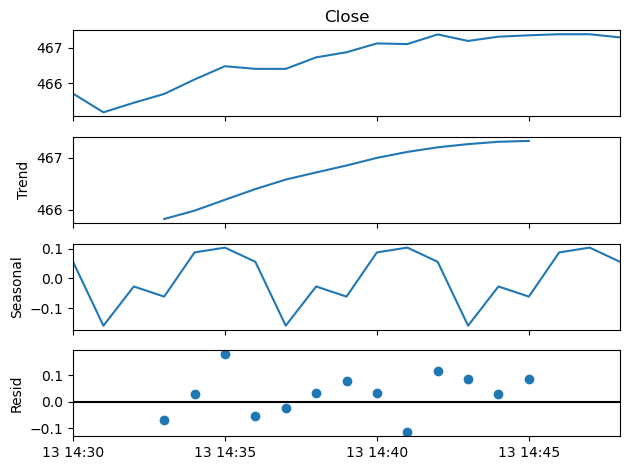

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
# The freq parameter is deprecated and replaced by period. You should use period that represents the number of observations per cycle
# For example, if you have daily data and expect a weekly pattern, you might set period=7.
result = seasonal_decompose(time_series, model='additive', period=6)

# Plot the decomposed components
result.plot()
plt.show()

Linear Regression (can Ignore)

Linear Regression on Difference in Close price

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,linear_model,metrics
from sklearn.linear_model import LinearRegression



# Now, let's perform linear regression with the dataframe's features.
X = df_grouped_by_minute
y = filtered_data['Close_diff'].reset_index(drop=True)

# Create the model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Get the model's coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Prepare a DataFrame for the coefficients
coeff_df = pd.DataFrame(coefficients, X.columns, columns=['Coefficient'])

coeff_df, intercept


(          Coefficient
 angry        0.099712
 disgust      0.119079
 fear         0.097141
 happy        0.098927
 sad          0.099477
 surprise     0.097023
 neutral      0.099528,
 -176.98450930442397)

In [ ]:
from sklearn.metrics import r2_score
from scipy import stats

# We already have the model fitted and the predictions can be made using model.predict(X)
predictions = model.predict(X)

# Calculate R^2 score
r2 = r2_score(y, predictions)

# To get p-values we need to perform an OLS regression using statsmodels because sklearn does not provide p-values
import statsmodels.api as sm

# Add a constant to the model (it's required for statsmodels OLS)
X_with_const = sm.add_constant(X)

# Fit the OLS model
ols_model = sm.OLS(y, X_with_const).fit()

# Get the summary of the model to extract the p-values
summary = ols_model.summary()

r2, summary.tables[1]


c:\Users\leyon\anaconda3\envs\new_etlenv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


(0.11870761944098984, <class 'statsmodels.iolib.table.SimpleTable'>)

In [ ]:
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-176.9845,285.306,-0.620,0.548,-804.939,450.970
angry,0.0997,0.160,0.623,0.546,-0.253,0.452
disgust,0.1191,0.186,0.640,0.535,-0.291,0.529
fear,0.0971,0.159,0.611,0.554,-0.253,0.447
happy,0.0989,0.160,0.618,0.549,-0.254,0.452
sad,0.0995,0.161,0.619,0.549,-0.254,0.453
surprise,0.0970,0.160,0.607,0.556,-0.255,0.449
neutral,0.0995,0.160,0.622,0.547,-0.253,0.452


Linear Regression on Closed Price 

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,linear_model,metrics
from sklearn.linear_model import LinearRegression



# Now, let's perform linear regression with the dataframe's features.
X = df_grouped_by_minute
y = filtered_data['Close'].reset_index(drop=True)

# Create the model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Get the model's coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Prepare a DataFrame for the coefficients
coeff_df = pd.DataFrame(coefficients, X.columns, columns=['Coefficient'])

coeff_df, intercept


(          Coefficient
 angry       -0.268861
 disgust     -0.257876
 fear        -0.257063
 happy       -0.271307
 sad         -0.281766
 surprise    -0.261972
 neutral     -0.268455,
 945.5952078390792)

In [ ]:
from sklearn.metrics import r2_score
from scipy import stats

# We already have the model fitted and the predictions can be made using model.predict(X)
predictions = model.predict(X)

# Calculate R^2 score
r2 = r2_score(y, predictions)

# To get p-values we need to perform an OLS regression using statsmodels because sklearn does not provide p-values
import statsmodels.api as sm

# Add a constant to the model (it's required for statsmodels OLS)
X_with_const = sm.add_constant(X)

# Fit the OLS model
ols_model = sm.OLS(y, X_with_const).fit()

# Get the summary of the model to extract the p-values
summary = ols_model.summary()

r2, summary.tables[1]


c:\Users\leyon\anaconda3\envs\new_etlenv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


(0.5389866766221123, <class 'statsmodels.iolib.table.SimpleTable'>)

In [ ]:
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,945.5952,668.890,1.414,0.185,-526.622,2417.813
angry,-0.2689,0.375,-0.716,0.489,-1.095,0.557
disgust,-0.2579,0.436,-0.591,0.566,-1.218,0.702
fear,-0.2571,0.373,-0.690,0.505,-1.077,0.563
happy,-0.2713,0.376,-0.722,0.485,-1.098,0.555
sad,-0.2818,0.377,-0.748,0.470,-1.111,0.547
surprise,-0.2620,0.375,-0.699,0.499,-1.087,0.563
neutral,-0.2685,0.375,-0.715,0.489,-1.094,0.557


Linear Regression on Volume as y

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,linear_model,metrics
from sklearn.linear_model import LinearRegression



# Now, let's perform linear regression with the dataframe's features.
X = df_grouped_by_minute
y = filtered_data['Volume'].reset_index(drop=True)

# Create the model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Get the model's coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Prepare a DataFrame for the coefficients
coeff_df = pd.DataFrame(coefficients, X.columns, columns=['Coefficient'])

coeff_df, intercept


(           Coefficient
 angry     28789.222814
 disgust  -70681.817104
 fear      32444.884493
 happy     29409.115214
 sad       26693.797158
 surprise  31144.694940
 neutral   29259.756563,
 -51675763.85924817)

In [ ]:
from sklearn.metrics import r2_score
from scipy import stats

# We already have the model fitted and the predictions can be made using model.predict(X)
predictions = model.predict(X)

# Calculate R^2 score
r2 = r2_score(y, predictions)

# To get p-values we need to perform an OLS regression using statsmodels because sklearn does not provide p-values
import statsmodels.api as sm

# Add a constant to the model (it's required for statsmodels OLS)
X_with_const = sm.add_constant(X)

# Fit the OLS model
ols_model = sm.OLS(y, X_with_const).fit()

# Get the summary of the model to extract the p-values
summary = ols_model.summary()

r2, summary.tables[1]


c:\Users\leyon\anaconda3\envs\new_etlenv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


(0.30911036145575965, <class 'statsmodels.iolib.table.SimpleTable'>)

In [ ]:
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-5.168e+07,1.95e+08,-0.265,0.796,-4.81e+08,3.78e+08
angry,2.879e+04,1.09e+05,0.263,0.797,-2.12e+05,2.7e+05
disgust,-7.068e+04,1.27e+05,-0.556,0.590,-3.51e+05,2.09e+05
fear,3.244e+04,1.09e+05,0.299,0.771,-2.07e+05,2.72e+05
happy,2.941e+04,1.09e+05,0.269,0.793,-2.12e+05,2.7e+05
sad,2.669e+04,1.1e+05,0.243,0.812,-2.15e+05,2.68e+05
surprise,3.114e+04,1.09e+05,0.285,0.781,-2.09e+05,2.72e+05
neutral,2.926e+04,1.09e+05,0.267,0.794,-2.12e+05,2.7e+05


Linear Regression on Changes in Price

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,linear_model,metrics
from sklearn.linear_model import LinearRegression



# Now, let's perform linear regression with the dataframe's features.
X = df_grouped_by_minute
y = filtered_data['change_volume'].reset_index(drop=True)

# Create the model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Get the model's coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Prepare a DataFrame for the coefficients
coeff_df = pd.DataFrame(coefficients, X.columns, columns=['Coefficient'])

coeff_df, intercept


(           Coefficient
 angry     12433.037826
 disgust  -19309.153641
 fear      10789.006540
 happy     11514.547436
 sad       13481.713847
 surprise  14581.690709
 neutral   12239.850861,
 -21858149.860110197)

In [ ]:
from sklearn.metrics import r2_score
from scipy import stats

# We already have the model fitted and the predictions can be made using model.predict(X)
predictions = model.predict(X)

# Calculate R^2 score
r2 = r2_score(y, predictions)

# To get p-values we need to perform an OLS regression using statsmodels because sklearn does not provide p-values
import statsmodels.api as sm

# Add a constant to the model (it's required for statsmodels OLS)
X_with_const = sm.add_constant(X)

# Fit the OLS model
ols_model = sm.OLS(y, X_with_const).fit()

# Get the summary of the model to extract the p-values
summary = ols_model.summary()

r2, summary.tables[1]


c:\Users\leyon\anaconda3\envs\new_etlenv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


(0.2365226046858937, <class 'statsmodels.iolib.table.SimpleTable'>)

In [ ]:
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-2.186e+07,1.85e+08,-0.118,0.908,-4.3e+08,3.86e+08
angry,1.243e+04,1.04e+05,0.119,0.907,-2.17e+05,2.41e+05
disgust,-1.931e+04,1.21e+05,-0.160,0.876,-2.86e+05,2.47e+05
fear,1.079e+04,1.03e+05,0.104,0.919,-2.17e+05,2.38e+05
happy,1.151e+04,1.04e+05,0.111,0.914,-2.18e+05,2.41e+05
sad,1.348e+04,1.04e+05,0.129,0.900,-2.16e+05,2.43e+05
surprise,1.458e+04,1.04e+05,0.140,0.891,-2.14e+05,2.43e+05
neutral,1.224e+04,1.04e+05,0.118,0.908,-2.17e+05,2.41e+05
